# Numerical solution of Burger's equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':11})

In [2]:
scheme = 1                        # Choose your scheme: 1 (upwind), 2 (corrected upwind)
Nx = 101;                         # Number of grid points
xmax = 2.;                        # Domain limit to the right
xmin = -2.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
x = np.arange(xmin,xmax,dx)       # Discretized mesh

dt = 0.04                         # Time step
t = 0.                            # Initial time
t_end = 2.                        # Final time

In [3]:
Uex0 = (x<-1)*0+(x<0)*(x>-1)*(1+x)+(x<1)*(x>0)*(1-x)+(x>1)*0   # Exact at t = 0
Uex1 = (x<-1)*0+(x<1)*(x>-1)*(0.5+0.5*x)+(x<1)*(x>1)*1+(x>1)*0 # Exact at t = 1
Uex2 = (x<-1)*0+(x<1.5)*(x>-1)*(0.32+0.32*x)+(x>1)*0           # Exact at t = 2

U = Uex0                          # Initial solution

In [4]:
# Temporal lop
while (t <= t_end):

    dt = min(dt,dx / max(abs(U)))
    sigma = dt/dx
    t = t+dt
  
  # Solve equation using upwind scheme
    if (scheme == 1):
        Un = U
        Um = np.roll(Un,1)
        Up = np.roll(Un,-1)
        U = Un - 0.5 * sigma * (Un + abs(Un)) * (Un-Um) - 0.5 * sigma * (Un - abs(Un)) * (Up - Un)

          
  # Solve equation using the corrected upwind scheme
    if (scheme == 2):
        Un = U;
        Um = np.roll(Un,1)
        Up = np.roll(Un,-1)
        a_plus = 0.5 * (Up + Un)
        a_minus = 0.5 * (Un + Um)
        U = Un - 0.5 * sigma * (a_minus + abs(a_minus)) * (Un-Um) - 0.5 * sigma * (a_plus - abs(a_plus)) * (Up-Un)

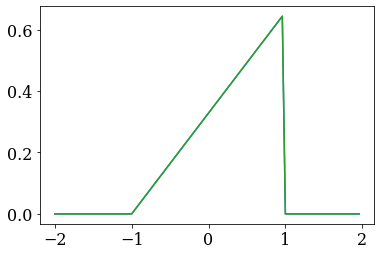

In [5]:
if (t==dt): 
    fig1, ax1 = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,U, color='k')
if (abs(t - 1) < 1e-9): 
    Unum1 = U;
    plt.plot(x,Unum1, color='C0')
if (t>1): 
    Unum1 = U;
    plt.plot(x,Unum1, color='C0')
if (abs(t - 2) < 1e-9): 
    Unum1 = U ; 
    plt.plot(x,Unum1, color='C2')

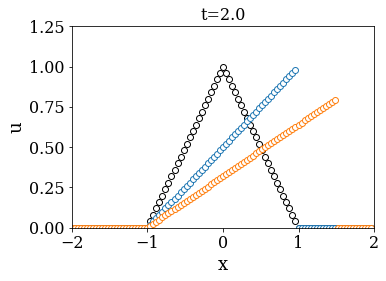

In [6]:
plt.scatter(x,Uex0, marker='o', facecolors='white', color='k')
plt.scatter(x,Uex1, marker='o', facecolors='white', color='C0')
plt.scatter(x,Uex2, marker='o', facecolors='white', color='C1')
plt.axis([xmin, xmax, 0, 1.25])
plt.title('t='+str(round(t,3)),fontsize=16)
plt.xlabel('x',fontsize=18)
plt.ylabel('u',fontsize=18)
plt.subplots_adjust(left=0.2)
plt.subplots_adjust(bottom=0.18)
plt.draw()
plt.show()